In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import least_squares
from astropy.coordinates import SkyCoord
from astropy import units as u
import peakutils

#import aplpy
from astropy.io import fits
import astropy.wcs as wcs

from astropy.time import Time as aTime

import datetime as dt, time

import pandas as pd

import warnings
warnings.filterwarnings("ignore")

In [2]:
with open('rfc_2023b.txt') as w:
    rfc2023b = np.array([s.split() for s in w.readlines()[211:]])
    
r = rfc2023b[:,(0,2,3,6,9,10,11,12,15,16,17,18)]

ra_hms = np.zeros(shape=rfc2023b.shape[0]).astype(str)
dc_dms = np.zeros(shape=rfc2023b.shape[0]).astype(str)
for i in range(rfc2023b.shape[0]):
    ra_hms[i]= '{}h{}m{}s'.format(rfc2023b[i,3],rfc2023b[i,4],rfc2023b[i,5])
    dc_dms[i]= '{}d{}m{}s'.format(rfc2023b[i,6],rfc2023b[i,7],rfc2023b[i,8])
    
r[:,2] = ra_hms
r[:,3] = dc_dms

R = pd.DataFrame(r,columns=['G','Name','RA','DEC','xerr','yerr','xyc','obs','C','Cures','X','Xures'])

In [10]:
#t1 = SkyCoord('18h40m34.51s -04d57m14.4s')
#t1 = SkyCoord('18h41m51.06s -05d01m43.5s') 
#t1 = SkyCoord('18h34m36.84s -08d01m00.7s') #g023
#t1 = SkyCoord('18h30m36.07s -10d07m10.9s') #g027.50
#t1 = SkyCoord('16:41:06.05 -47:07:02.5',unit=(u.hourangle,u.degree))  #g031.12
#t1 = SkyCoord('15:00:55 -58:58:52',unit=(u.hourangle,u.degree))  	#g318
#t1 = SkyCoord('11:23:42.2 -60:54:33.5',unit=(u.hourangle,u.degree))  	#g292
#t1 = SkyCoord(' 14:19:36.0 -60:51:59.0',unit=(u.hourangle,u.degree))  	#g313
#t1 = SkyCoord('17:49:59.84 -27:30:36.9',unit=(u.hourangle,u.degree))
#t1 = SkyCoord('17:31:13.91 -35:44:08.7',unit=(u.hourangle,u.degree))
t1 = SkyCoord('16:40:34.01 -45:42:07.1',unit=(u.hourangle,u.degree)) # g338

c = SkyCoord(ra_hms,dc_dms)

sep1 = (c.separation(t1).value < 7.0)

In [17]:
indx  = (R['X'].astype(float) > .01)*sep1*(R['G']=='C')
c1    = c[indx]
names = r[indx,1]

In [18]:
c1.separation(t1).value

array([6.42699472, 4.91653963, 6.58600356, 3.00012804, 2.50996122,
       1.3821017 , 4.71513767, 5.29687483, 4.24054913, 4.50147867,
       6.5431753 , 6.39906525])

Text(0.5, 0, 'EW offset')

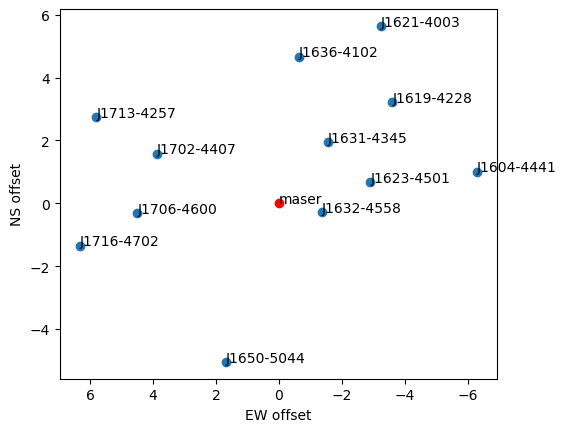

In [19]:
fig, ax = plt.subplots(1)
ax.plot((c1.ra.deg - t1.ra.deg)*np.cos(t1.dec.rad),c1.dec.deg - t1.dec.deg,'o')
ax.plot(0,0,'ro')
ax.text(0,0,'maser')
for i in range(len(names)):
    ax.text((c1[i].ra.deg - t1.ra.deg)*np.cos(t1.dec.rad),c1[i].dec.deg - t1.dec.deg,names[i])
ax.invert_xaxis()
ax.set_aspect('equal')
ax.set_ylabel('NS offset')
ax.set_xlabel('EW offset')
#fig.savefig('/Users/lucas3/G00171m0.08_quasars.pdf',bbox_inches='tight')


In [20]:
R[indx][R[indx]['Xures']!='-1.00']
R[indx]

,G,Name,RA,DEC,xerr,yerr,xyc,obs,C,Cures,X,Xures
15029,C,J1604-4441,16h04m31.0,-44d41m31.,0.17,0.15,0.063,455,1.046,0.547,0.770,0.236
15247,C,J1619-4228,16h19m54.9,-42d28m15.,2.76,1.62,-0.033,48,-1.00,-1.00,0.018,0.017
15276,C,J1621-4003,16h21m59.6,-40d03m34.,0.23,0.37,-0.044,237,0.250,-1.00,0.248,0.062
15298,C,J1623-4501,16h23m54.7,-45d01m59.,1.58,1.24,0.086,62,-1.00,-1.00,0.093,-1.00
15435,C,J1631-4345,16h31m37.9,-43d45m25.,1.45,0.77,-0.001,39,-1.00,-1.00,0.220,0.168
15446,C,J1632-4558,16h32m46.7,-45d58m01.,0.32,0.42,0.151,158,-1.00,-1.00,0.262,0.033
15501,C,J1636-4102,16h36m55.3,-41d02m00.,0.26,0.47,-0.255,341,0.038,-1.00,0.413,0.040
15699,C,J1650-5044,16h50m16.6,-50d44m48.,0.18,0.14,0.214,334,-1.00,-1.00,1.313,0.965
15864,C,J1702-4407,17h02m47.5,-44d07m06.,2.23,2.07,0.065,63,-1.00,-1.00,0.164,-1.00
15908,C,J1706-4600,17h06m22.0,-46d00m17.,1.45,0.87,-0.030,45,-1.00,-1.00,0.125,0.119


In [199]:
c.separation(t1).value[(R[8].astype(float) > .07)*sep1]

array([4.82691179, 4.57491038, 3.30933333, 2.49649015, 3.90668145,
       4.61729572, 4.84554331, 4.58876695, 4.96421352])

In [239]:
#with open('icrf3.txt') as w:
#    icrf3 = [s.split() for s in w.readlines()[22:]]

In [261]:
icrf3 = pd.read_fwf('icrf3.txt',skiprows=22).values

In [265]:
ra_hms = np.zeros(shape=icrf3.shape[0]).astype(str)
dc_dms = np.zeros(shape=icrf3.shape[0]).astype(str)
for i in range(icrf3.shape[0]):
    ra_hms[i]= '{}h{}m{}s'.format(icrf3[i,4],icrf3[i,5],icrf3[i,6])
    dc_dms[i]= '{}d{}m{}s'.format(icrf3[i,7],icrf3[i,8],icrf3[i,9])

In [266]:
ICRF3 = SkyCoord(ra_hms,dc_dms)

In [294]:
I1 = ICRF3[ICRF3.separation(t1).value<3]

In [295]:
c1 = c[c.separation(t1).value<3]

In [26]:
imgpath = '/Users/Lucas/fits/1131m167_ac51-w1-int-3.fits'
hdu = fits.getheader(imgpath)
w = wcs.WCS(imgpath).celestial

n = 35
w.array_shape = (1024*n-1,1024*n-1)
w.wcs.crpix = np.array([(w.array_shape[0]+1)/2,(w.array_shape[0]+1)/2])
w.wcs.crval = np.array([t1.ra.value,t1.dec.value])

srcs = c[:6]

#xoffs = [-2.2, 2.2,-2.2, 2.2, 2.2,-2.2]
#yoffs = [ 0, 0, 0, 0, 0, 0]

fig1 = plt.figure(figsize=(7,7));
ax = aplpy.FITSFigure(w, figure=fig1,convention='calabretta')

ax.axis_labels.set_font(size='14')
ax.tick_labels.set_font(size='14');

ax.ax.grid(True)
ax.add_scalebar(3*u.deg,'3 deg')

ax.show_markers(t1.ra.deg,t1.dec.deg,s=50,marker='o',
                edgecolor='red',linewidth=1,fc='blue',zorder=99)
ax.show_markers(t2.ra.deg,t2.dec.deg,s=50,marker='o',
                edgecolor='blue',linewidth=1,fc='red',zorder=99)

ax.show_markers(c1.ra.deg,c1.dec.deg,s=50,
                marker='s',edgecolor='k',linewidth=0.5,fc='w',zorder=99);

ax.show_markers(I1.ra.deg,I1.dec.deg,s=50,
                marker='s',edgecolor='b',linewidth=0.5,fc='b',zorder=99);

#for i in range(len(names)):
#    ax.add_label(c1[i].ra.deg,c1[i].dec.deg+0.5,names[i])


FileNotFoundError: [Errno 2] No such file or directory: '/Users/Lucas/fits/1131m167_ac51-w1-int-3.fits'

In [58]:
icrf3[ICRF3.separation(t1).value<3,2]

NameError: name 'icrf3' is not defined

In [55]:
from astropy.time import Time as aTime
import numpy as np

with open('loop.txt','r+') as w:
    times = np.array(w.readlines())



In [59]:
(np.diff(aTime([datetime.datetime.strptime(s,'%H:%M:%S\n') for s in times]).mjd)*86400/60)

array([    3.98333333,     4.        ,     4.01666667,     4.03333333,
           4.06666667,     4.08333333,     4.13333333,     4.21666667,
           4.28333333,     4.38333333,     4.46666667,     4.56666667,
           4.66666667,     4.78333333,     4.9       ,     5.01666667,
           5.13333333,     5.28333333,     5.36666667,     5.43333334,
           5.45      ,     5.38333333,     5.28333333,     5.21666667,
           5.16666667,     5.1       ,     5.01666667,     4.91666667,
           4.8       ,     4.71666667,     4.61666667,     4.51666666,
           4.43333334,     4.35      ,     4.28333333,     4.25      ,
           4.25      ,     4.28333333,     4.28333333,     4.31666667,
           4.31666667,     4.35      ,     4.36666667,     4.38333333,
           4.38333333,     4.45      ,     4.46666667,     4.51666667,
           4.55      ,     4.6       ,     4.6       ,     4.65      ,
           4.66666667,     4.66666667,     4.7       ,     4.73333333,
      

In [5]:
t1 = SkyCoord('16:41:06.05 -47:07:02.5',unit=(u.hourangle,u.degree)) 

In [27]:
with open('FringeFindersSpirals.txt','r+') as w:
    ffs = np.array([s.split()[0:3] for s in w.readlines()[6:]])

In [48]:
((ffs[:,1:3].astype(float) - [t1.ra.deg,t1.dec.deg])**2).sum(1)**0.5

array([180.23888461, 166.32570696, 165.59312037, 160.94847277,
       123.62850206, 124.0489553 , 109.81314179,  83.40540557,
        74.05795821,  69.78303633,  57.18416514,  33.66580089,
        36.43007796,  46.04905264,  46.22214837,  44.67012633,
       135.81822191, 134.77654842, 130.49556638, 128.14523218,
       126.19160954, 118.38852197, 117.414585  , 117.61147027,
       114.53296622, 109.8131418 , 106.00736778,  98.76824779,
        96.58554157,  90.80943566,  89.84084658,  89.63921167,
        87.73806773,  86.12979985,  81.27985403,  78.15118805,
        79.19421974,  76.27069544,  75.27292989,  66.13636947,
        60.66728941,  61.61509717,  54.99016873,  48.91784227,
        48.8596312 ,  49.23086494,  45.55288782,  23.27793134,
        24.02559694,  21.61948271,  23.23427332,  17.80569038,
        17.99737428,  16.31217604,   9.4620205 ,  10.48549131,
        13.11279691,  15.07072028,  14.21482391,  17.55108014,
         4.29360536,  21.512678  ,  10.59111657,  21.70

## Proper Motion stuff

In [67]:
masers = np.array(
[[292.46,+0.16,   11],
[300.50,-0.17,     8],
[313.46,+0.19,    -9],
[320.42,+0.08,    -8],
[329.61,+0.11,   -60],
[337.70,-0.05,   -54],
[350.47,+0.02,    -6],
[359.61,-0.24,    23],
[000.49,+0.18,     1],
[001.14,-0.12,   -15],
[001.71,-0.08,    -8],
[003.25,+0.01,     2],
[299.77,-0.00,    -7],
[340.78,-0.09,  -100 ]])

l = masers[:,0]
l[l < 180] += +360
v = masers[:,-1]

(-150.0, 50.0)

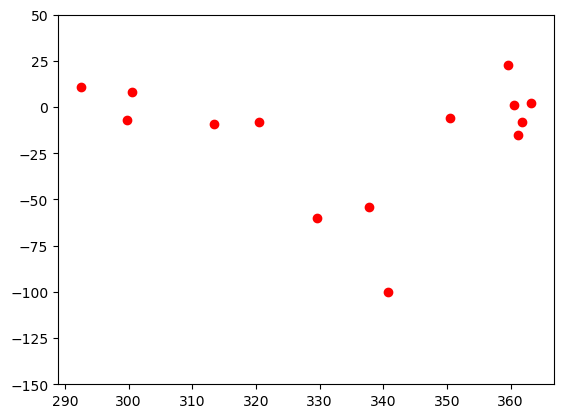

In [70]:
fig, ax = plt.subplots(1)
ax.plot(l,v,'ro')
ax.set_ylim(-150,50)